# Hi, In this notebook, We will be extracting raw data from excel which can be downloaded from http://www.screener.in , processing it and then plotting a few Financial ratios in CAGR for given period in rolling fashion.

Data Source - https://www.screener.in

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import chain
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='darkgrid')

# Let's look at a sample excel and see how our data is, Let's use Hexaware Tech's data file

In [3]:
df = pd.read_excel('Hexaware Tech.xlsx', sheet_name=5)
df = df.drop(list(range(14)), axis=0)
df = df.iloc[0:16]
df = df.set_index('COMPANY NAME').T
df = df.reset_index(drop=True)
df['Report Date'] = df['Report Date'].dt.strftime('%Y')
df['Year'] = df['Report Date'].astype(int)
df = df.set_index('Year')
df.columns.name = 'Hexaware Tech'

print(df.columns.name)

Hexaware Tech


In [4]:
df.head(20)

Hexaware Tech,Report Date,Sales,Raw Material Cost,Change in Inventory,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Dividend Amount
Year,,,,,,,,,,,,,,,,
2008,2008,1151.91,NaN,NaN,11.59,163.55,688.18,149.54,56.61,23.09,28.42,3.16,74.45,15.47,58.98,14.37
2009,2009,1038.56,NaN,NaN,9.62,127.27,571.07,114.64,79.21,37.48,27.09,2.62,144.52,10.34,134.18,20.11
2010,2010,1054.56,NaN,NaN,10.4,160.89,675.48,116.03,67.32,119.15,24.23,3.23,116.13,8.54,107.59,43.56
2011,2011,1450.51,NaN,NaN,14.26,219.64,821.02,122.94,-14.43,48.21,24.7,3.06,307.53,40.5,267.03,117.34
2012,2012,1948.18,NaN,NaN,17.99,318.24,1060.56,132.51,25.2,43.77,32.41,1.13,403.96,76.32,327.65,160.14
2013,2013,2285.35,NaN,NaN,17.2,369.55,1221.88,145.53,49.14,37.27,38.6,1.23,479.5,100.36,379.14,332.89
2014,2014,2581.68,NaN,NaN,17.81,449.11,1459.63,165.24,48.75,16.22,43.97,1.82,418.12,97.97,320.15,284.4
2015,2015,3123.52,NaN,NaN,19.52,599.89,1773.22,172.49,13.45,9.02,48.25,1.11,504.61,111.4,393.21,260.84
2016,2016,3534.9,NaN,NaN,21.37,686.86,1994.39,236.54,18.38,39.43,55.25,1.14,560.4,141.24,419.16,166.13


In [5]:
df.describe()

Hexaware Tech,Report Date,Sales,Raw Material Cost,Change in Inventory,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Dividend Amount
count,10,10.00,0.0,0.0,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.0,10.00,10.00,10.0
unique,10,10.00,0.0,0.0,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.0,10.00,10.00,10.0
top,2010,1151.91,NaN,NaN,14.26,127.27,1773.22,165.24,79.21,119.15,63.28,1.82,479.5,15.47,379.14,284.4
freq,1,1.00,NaN,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0


# We are using the log scale to better visualize the change in rate of growth

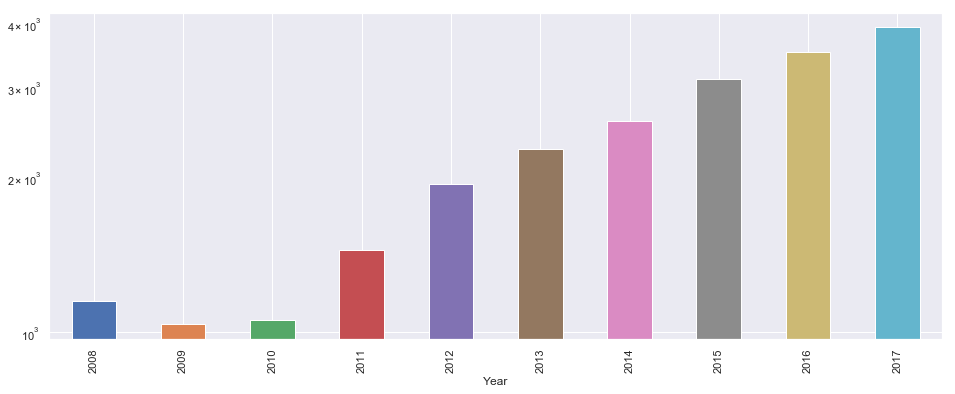

In [6]:
df['Sales'].plot(kind='bar', logy=True)
plt.show()

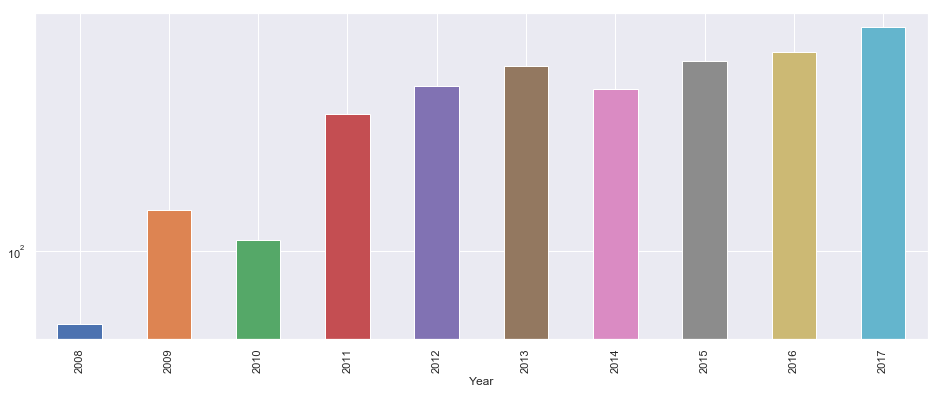

In [7]:
df['Net profit'].plot(kind='bar', logy=True)
plt.show()

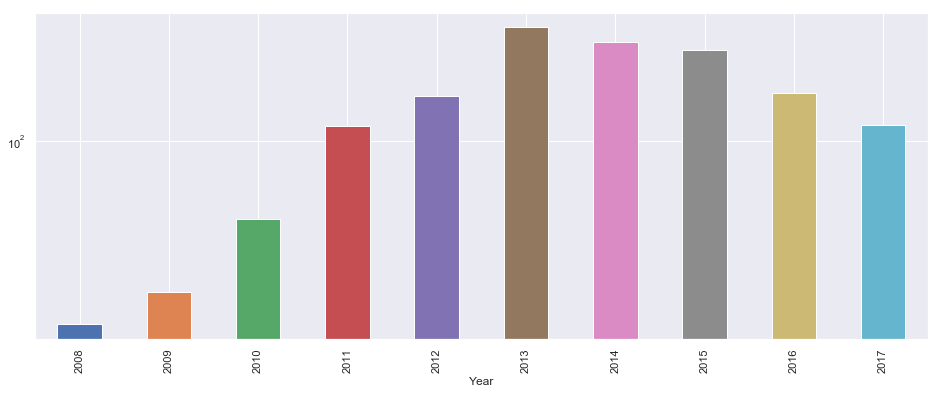

In [8]:
df['Dividend Amount'].plot(kind='bar', logy=True)
plt.show()

In [9]:
class DFCleanser:
  def __init__(self, df,pivotcol,dfname,indexcol,dfcolname):
    self.df = df
    self.pivotcol = pivotcol
    self.dfname = dfname
    self.indexcol = indexcol
    self.dfcolname = dfcolname

  def Cleanse(self):
    # Removes every row from the pivotcol that is empty
    df.dropna(subset=[self.pivotcol], inplace=True)
    #Resets index
    df.reset_index(drop=True,inplace=True)
    dfarray = []
    splitters = df[df[pivotcol] == self.indexcol].index
    for index,splitter in enumerate(splitters):
        if (index < len(splitters) - 1):
            tempdf = pd.DataFrame(df.iloc[splitter:splitters[index+1]]).T
        else:
            tempdf = pd.DataFrame(df.iloc[splitter:]).T
        tempdf.columns = tempdf.iloc[0]
        tempdf.dropna(subset=[self.indexcol], inplace=True)
        tempdf = tempdf.iloc[1:]
        tempdf.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
        tempdf.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)
        tempdf[self.dfcolname] = self.dfname
        dfarray.append(tempdf)
    return dfarray

In [10]:
import os
import glob
extension = 'xlsx'
companies = [i for i in glob.glob(f'*.{extension}')]
masterdfarray = []

for company in companies:
    df = pd.read_excel(company, sheet_name=5)
    columns = list(df.columns)
    [pivotcol, dfname], indexcol, dfcolname  = columns[0:2], 'Report Date', 'Company'
    mydf = DFCleanser(df, pivotcol, dfname, indexcol, dfcolname)
    print(company.split('.')[0])
    masterdfarray.append(mydf.Cleanse())
print('Done')

DCM Shriram
Hexaware Tech
Infosys
Kellton Tech
Mindtree
Star Cement
Tata Elxsi
TCS
Done


In [11]:
merged_df = []
dfindexes = ["Year", "month.Year", "Year", "Year"]
for df in masterdfarray[0]:
    merged_df.append([])
for dfarray in masterdfarray:
    for index,df in enumerate(dfarray):
        merged_df[index].append(df)
"""
# Below is the reason for converting to dict and then back to df
# Need to user iter tools chain method as some df's have inconsistent columns, check print statement 
merged_df = [PLdfarray,QPLdfarray,BSdfarray,CFdfarray]
PLdfarray = pd.concat(PLdfarray, ignore_index=True)
QPLdfarray = pd.concat(QPLdfarray, ignore_index=True)
#BSdfarray = pd.concat(BSdfarray, axis=0, ignore_index=True)
CFdfarray = pd.concat(CFdfarray, ignore_index=True)
for el in BSdfarray:
    print(list(el.columns))
list_of_dicts = [cur_df.T.to_dict().values() for cur_df in BSdfarray]    
BSdfarray = pd.DataFrame(list(chain(*list_of_dicts)))
PLdfarray.head()
"""
for index,df in enumerate(merged_df):
    list_of_dicts = [cur_df.T.to_dict().values() for cur_df in df]    
    merged_df[index] = pd.DataFrame(list(chain(*list_of_dicts)))
    merged_df[index].fillna(0, inplace=True)
    merged_df[index].replace({'NaT': np.nan}, inplace=True)
    merged_df[index].dropna(inplace=True)
    if dfindexes[index] == "Year":
        merged_df[index]["Report Date"] = merged_df[index]["Report Date"].dt.strftime('%Y').astype(int)
        merged_df[index]['Year'] = merged_df[index]["Report Date"]
    if dfindexes[index] == "month.Year":
        merged_df[index]["Report Date"] = merged_df[index]["Report Date"].dt.strftime('%m.%Y')
        merged_df[index]['Year'] = merged_df[index]["Report Date"].astype(float)
    merged_df[index] = merged_df[index].set_index('Year')

# PLdf = Profit & Loss df
# QPLdf = Quarterly Profit & Loss df
# BSdf = Balance Sheet df
# CFdf = Cash Flow df
[PLdf,QPLdf,BSdf,CFdf] = merged_df

In [12]:
df = pd.merge(PLdf, BSdf,  how='left', left_on=['Year','Company'], right_on = ['Year','Company'])
df = pd.merge(df, CFdf,  how='left', left_on=['Year','Company'], right_on = ['Year','Company'])

In [13]:
columns = df.columns
print(columns)

Index(['Change in Inventory', 'Company', 'Depreciation', 'Dividend Amount',
       'Employee Cost', 'Interest', 'Net profit', 'Other Expenses',
       'Other Income', 'Other Mfr. Exp', 'Power and Fuel', 'Profit before tax',
       'Raw Material Cost', 'Report Date_x', 'Sales', 'Selling and admin',
       'Tax', 'Borrowings', 'Capital Work in Progress', 'Cash & Bank',
       'Equity Share Capital', 'Face value', 'Inventory', 'Investments',
       'Net Block', 'New Bonus Shares', 'No. of Equity Shares', 'Other Assets',
       'Other Liabilities', 'Receivables', 'Report Date_y', 'Reserves',
       'Total', 'Cash from Financing Activity', 'Cash from Investing Activity',
       'Cash from Operating Activity', 'Net Cash Flow', 'PRICE:',
       'Report Date'],
      dtype='object')


In [14]:
# Dropping duplicate columns
columns_to_drop = list(columns)
to_drop = ["_x", "_y"]
columns_to_drop = [col for col in columns_to_drop for el in to_drop if el in col]
print(columns_to_drop)
df.drop(columns_to_drop, axis=1, inplace=True)
columns = df.columns
print(columns)

['Report Date_x', 'Report Date_y']
Index(['Change in Inventory', 'Company', 'Depreciation', 'Dividend Amount',
       'Employee Cost', 'Interest', 'Net profit', 'Other Expenses',
       'Other Income', 'Other Mfr. Exp', 'Power and Fuel', 'Profit before tax',
       'Raw Material Cost', 'Sales', 'Selling and admin', 'Tax', 'Borrowings',
       'Capital Work in Progress', 'Cash & Bank', 'Equity Share Capital',
       'Face value', 'Inventory', 'Investments', 'Net Block',
       'New Bonus Shares', 'No. of Equity Shares', 'Other Assets',
       'Other Liabilities', 'Receivables', 'Reserves', 'Total',
       'Cash from Financing Activity', 'Cash from Investing Activity',
       'Cash from Operating Activity', 'Net Cash Flow', 'PRICE:',
       'Report Date'],
      dtype='object')


In [15]:
df.head(20)
#PLdf.head(20)
#QPLdf.head(20)
#BSdf.head(20)
#CFdf.head(20)

,Change in Inventory,Company,Depreciation,Dividend Amount,Employee Cost,Interest,Net profit,Other Expenses,Other Income,Other Mfr. Exp,...,Other Liabilities,Receivables,Reserves,Total,Cash from Financing Activity,Cash from Investing Activity,Cash from Operating Activity,Net Cash Flow,PRICE:,Report Date
Year,,,,,,,,,,,,,,,,,,,,,
2009,-52.04,DCM SHRIRAM LTD,148.73,13.34,258.55,150.43,122.61,138.92,50.69,226.44,...,878.70,409.42,1234.91,4134.09,49.21,-335.28,271.43,-14.64,29.577778,2009
2010,27.02,DCM SHRIRAM LTD,162.96,13.34,287.85,88.56,84.25,151.16,53.90,228.88,...,928.64,257.81,1296.02,3718.91,-642.75,-64.34,709.91,2.82,58.347619,2010
2011,224.41,DCM SHRIRAM LTD,159.98,6.67,339.79,103.92,-14.27,123.92,13.43,214.64,...,963.99,406.20,1273.03,3961.63,138.59,-72.83,-50.41,15.35,43.710526,2011
2012,322.12,DCM SHRIRAM LTD,156.88,6.67,377.43,160.29,11.92,171.48,-17.81,257.80,...,1565.34,719.19,1281.87,4698.68,-99.97,-82.23,298.51,116.31,45.363158,2012
2013,61.91,DCM SHRIRAM LTD,146.79,26.67,395.27,154.83,202.89,195.06,-15.86,270.36,...,1763.33,1033.57,1462.05,4815.85,-442.61,40.01,318.53,-84.07,55.660000,2013
2014,-270.61,DCM SHRIRAM LTD,137.89,32.77,414.13,148.58,242.38,144.93,49.78,262.47,...,2067.39,1041.39,1653.87,4931.33,-584.74,-200.48,969.35,184.13,91.726316,2014
2015,-26.89,DCM SHRIRAM LTD,110.20,35.90,447.15,111.75,210.80,152.24,51.58,263.97,...,1885.84,1070.94,1825.90,4504.21,-594.38,227.92,166.63,-199.83,123.112500,2015
2016,208.24,DCM SHRIRAM LTD,97.95,52.22,487.66,85.41,301.75,159.68,40.69,262.95,...,2063.13,1286.87,2066.56,5226.29,166.28,-325.99,100.22,-59.49,156.726316,2016
2017,240.65,DCM SHRIRAM LTD,113.73,94.66,532.59,71.43,551.68,185.32,46.77,252.92,...,2242.77,1004.46,2503.05,5852.31,-184.96,-411.46,772.48,176.06,326.721053,2017


In [16]:
"""
# Helper code for writing classes initialization
test = 'df,pivotcol,indexcol,indexname,dfname'.split(',')
print(test)
for el in test:
    print(f'    self.{el} = {el}')
"""

"\n# Helper code for writing classes initialization\ntest = 'df,pivotcol,indexcol,indexname,dfname'.split(',')\nprint(test)\nfor el in test:\n    print(f'    self.{el} = {el}')\n"

In [17]:
class Finance:
  def __init__(self, df,props,chunkprop,chunk,hue=None):
    self.df = df
    self.hue = hue
    self.props = props
    self.chunkprop = chunkprop
    self.df[self.chunkprop] = self.df[self.chunkprop].astype(int, copy=False)
    self.chunk = int(chunk)
    self.result = {}

  def CAGR(self):
    masterdf = []
    if self.hue == None:
        self.allhue = [self.hue]
    else:
        self.allhue = self.df[self.hue].unique()
    for hue in self.allhue:
        self.result = {}
        if hue == None:
            self.tempdf = self.df
        else:
            self.tempdf = self.df[self.df[self.hue] == hue]
        self.allpieces = self.tempdf[self.chunkprop].unique()
        self.maxchunk = max(self.allpieces)
        for prop in self.props:
            res = {}
            for piece in self.allpieces:
                lowRange = min(piece,self.maxchunk)
                highRange = min(self.chunk + piece,self.maxchunk)
                boundary = piece + self.chunk
                if boundary <= self.maxchunk:

                    res[f'{lowRange} - {highRange}'] = round(
                        (self.tempdf.loc[highRange,prop] / self.tempdf.loc[lowRange,prop])
                        **(1/(highRange - lowRange))-1
                        ,3)

            self.result[prop] = res
        res = pd.DataFrame.from_dict(self.result)
        res.index.names = ['Time Period']
        if self.hue != None:
            res[self.hue] = hue
        masterdf.append(res)
    return pd.concat(masterdf)

# Change properties to plot for a different column

## Change bin_years to have different sized bin to calculate the CAGR

In [18]:
properties = ["Sales", "Net profit", "Dividend Amount", "Reserves"]
bin_years = 4
FinData = Finance(df,properties,"Report Date",bin_years,hue="Company")
FinData_df = FinData.CAGR()
for prop in properties:
    FinData_df[prop] = FinData_df[prop] * 100
print(FinData_df)

             Sales  Net profit  Dividend Amount  Reserves  \
Time Period                                                 
2009 - 2013   12.1        13.4             18.9       4.3   
2010 - 2014   15.1        30.2             25.2       6.3   
2011 - 2015    8.0         NaN             52.3       9.4   
2012 - 2016    3.5       124.3             67.3      12.7   
2013 - 2017    1.1        28.4             37.3      14.4   
2014 - 2018    2.8        28.9             42.2      16.2   
2008 - 2012   14.0        53.5             82.7      15.9   
2009 - 2013   21.8        29.7            101.7       8.5   
2010 - 2014   25.1        31.3             59.8       7.1   
2011 - 2015   21.1        10.2             22.1       9.4   
2012 - 2016   16.1         6.4              0.9      10.1   
2013 - 2017   14.6         7.1            -22.7      14.4   
2009 - 2013   16.8        12.0             15.6      20.4   
2010 - 2014   21.8        14.2             26.0      18.1   
2011 - 2015   18.0      

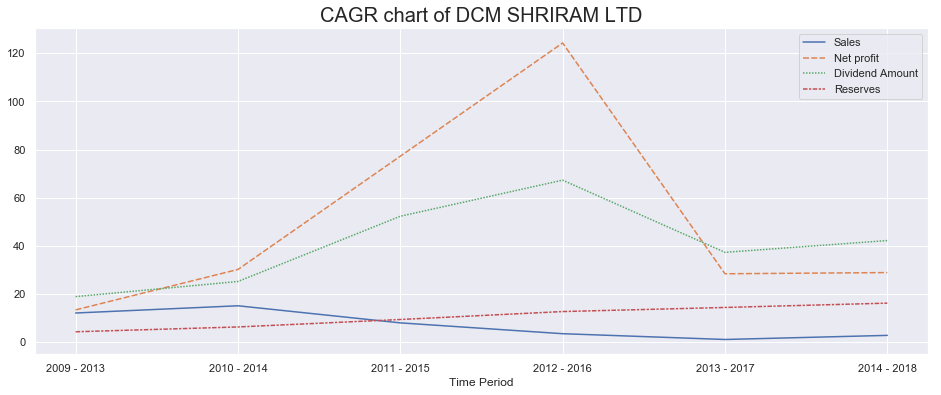

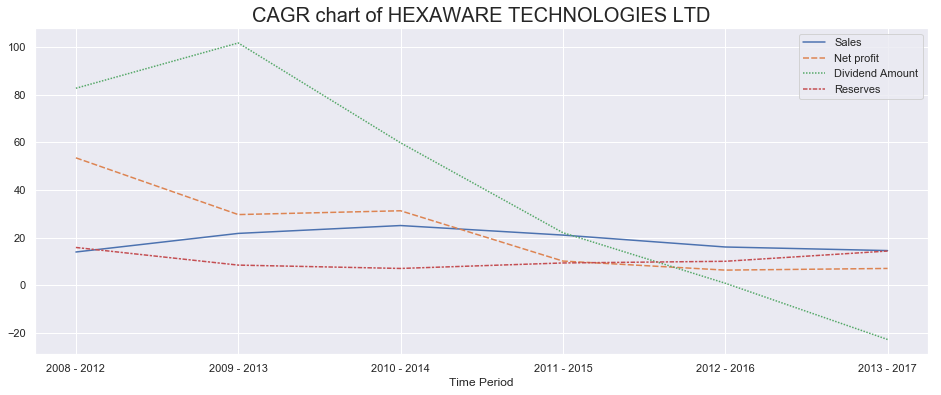

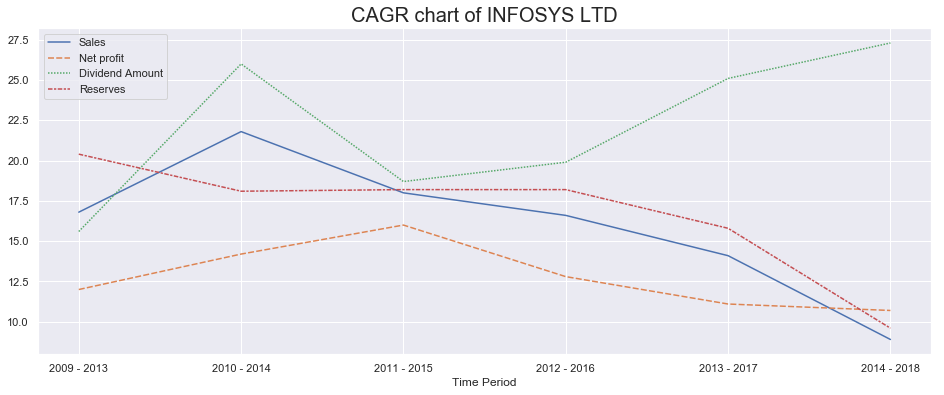

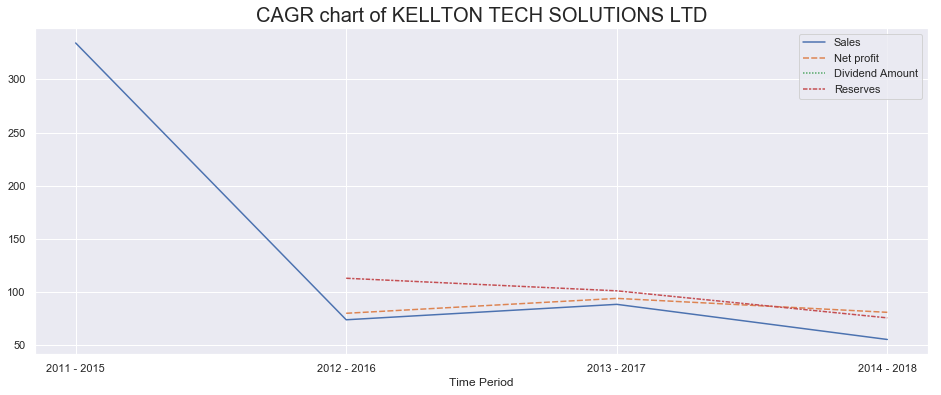

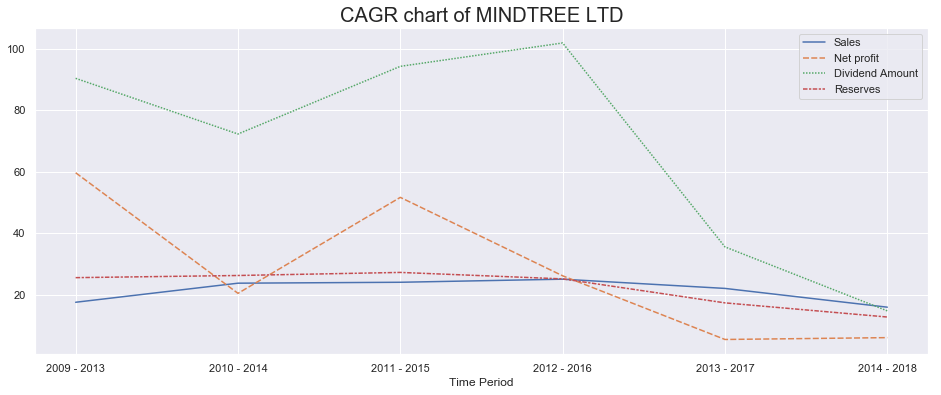

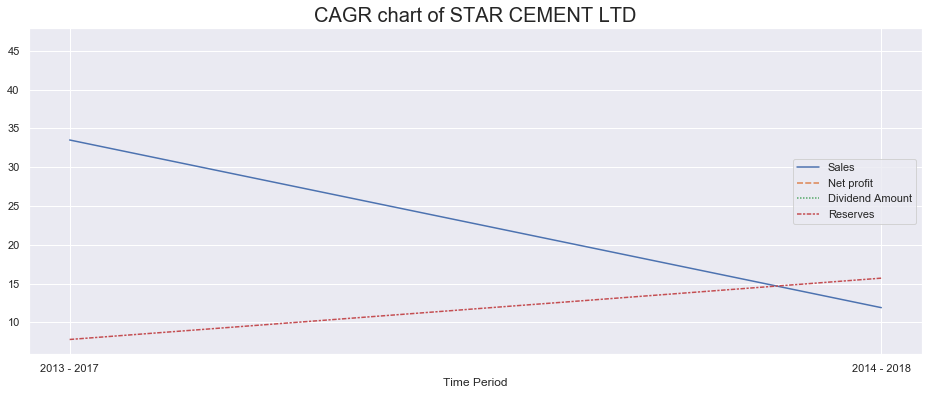

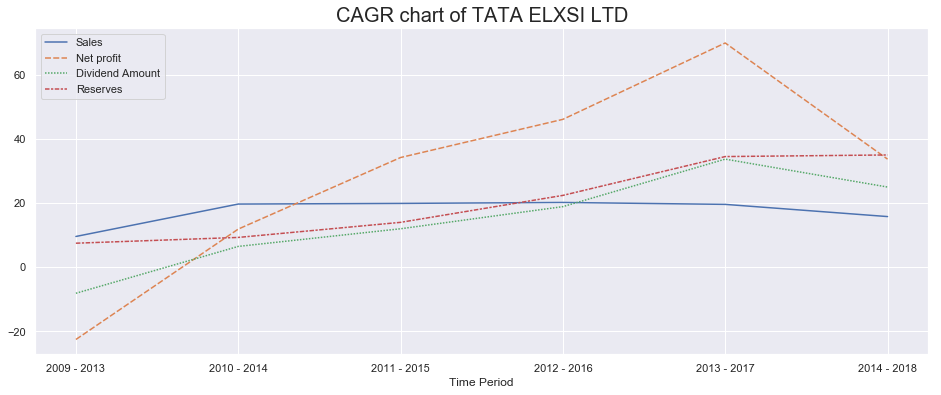

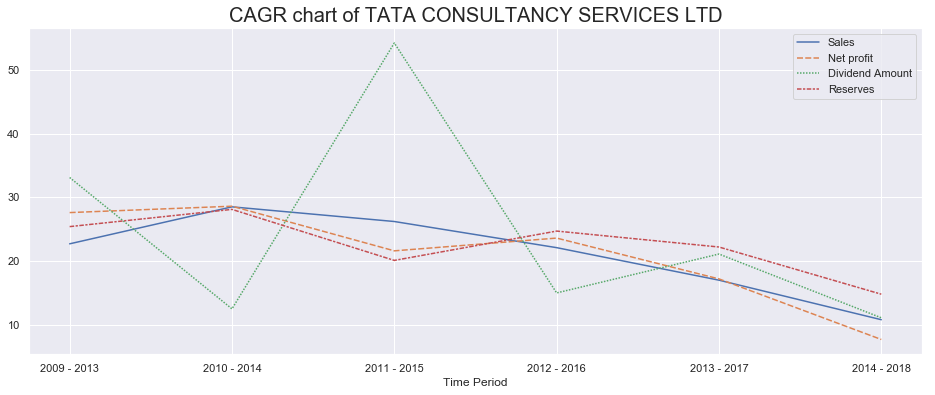

In [19]:
for company in FinData_df["Company"].unique():
    tempdf = FinData_df[FinData_df["Company"] == company]
    tempdf = tempdf.drop(columns=["Company"])
    ax = sns.lineplot(data=tempdf)
    ax.set_title('CAGR chart of ' + company, fontsize=20)
    plt.show()

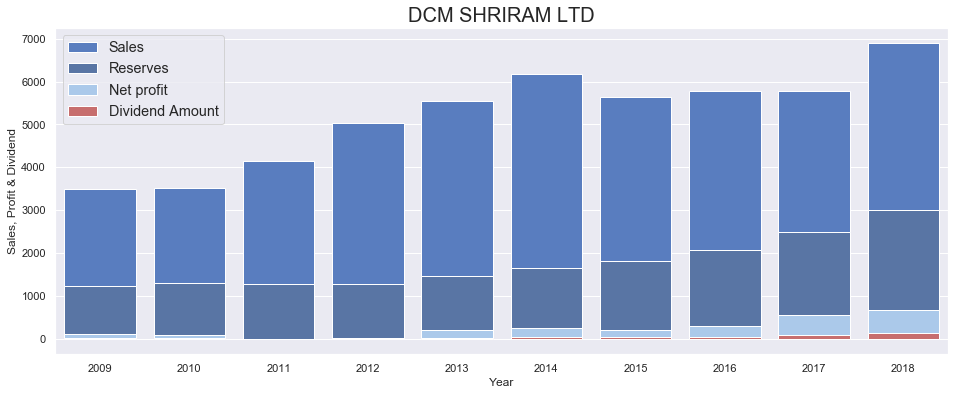

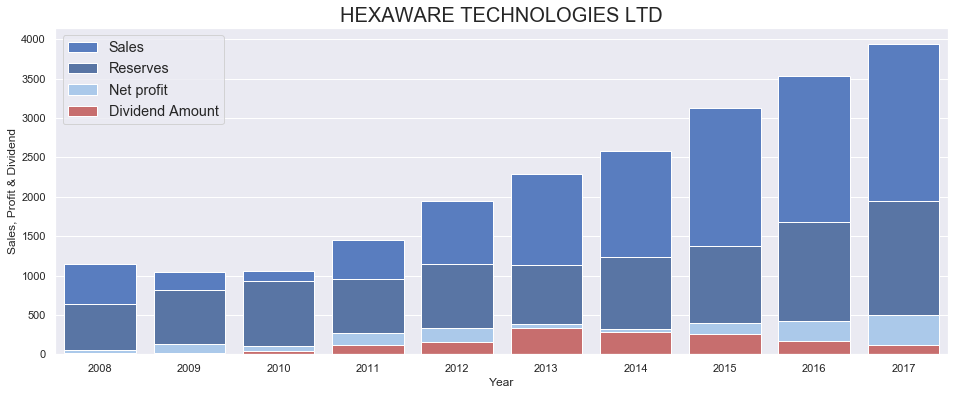

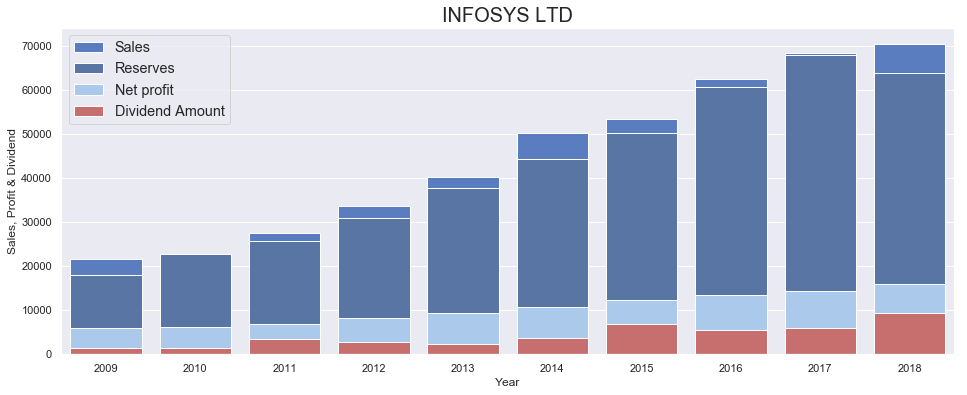

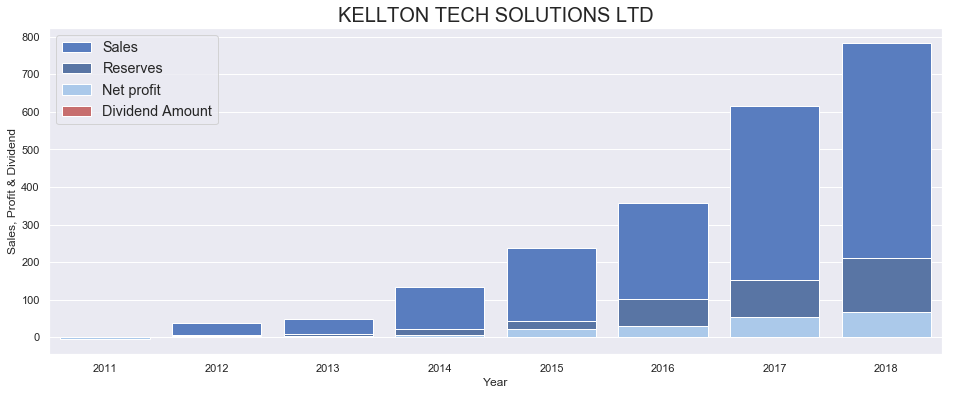

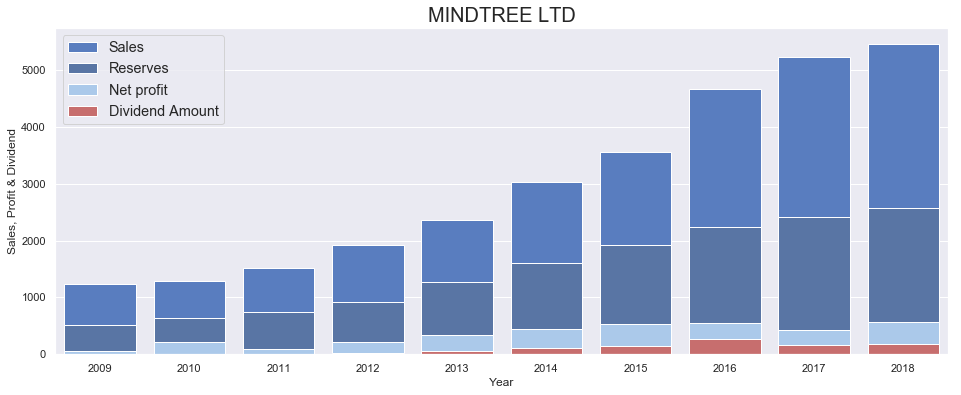

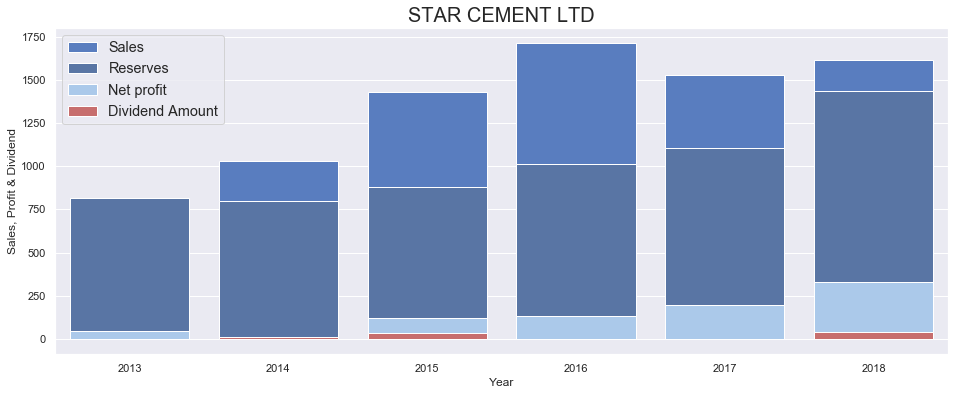

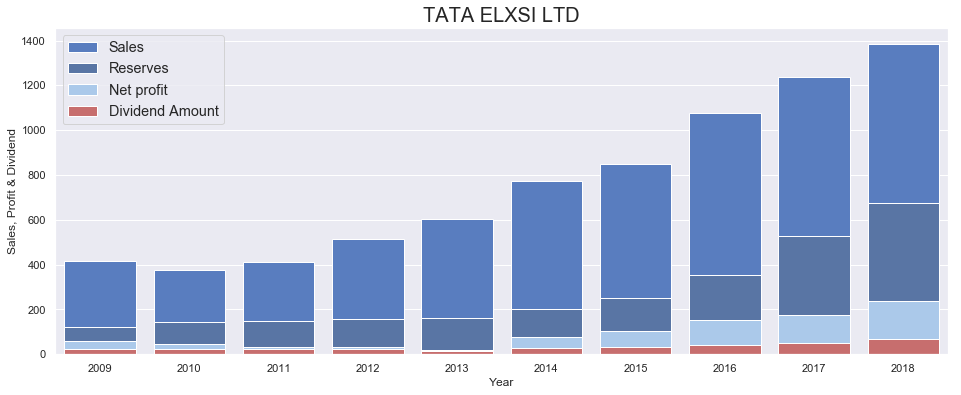

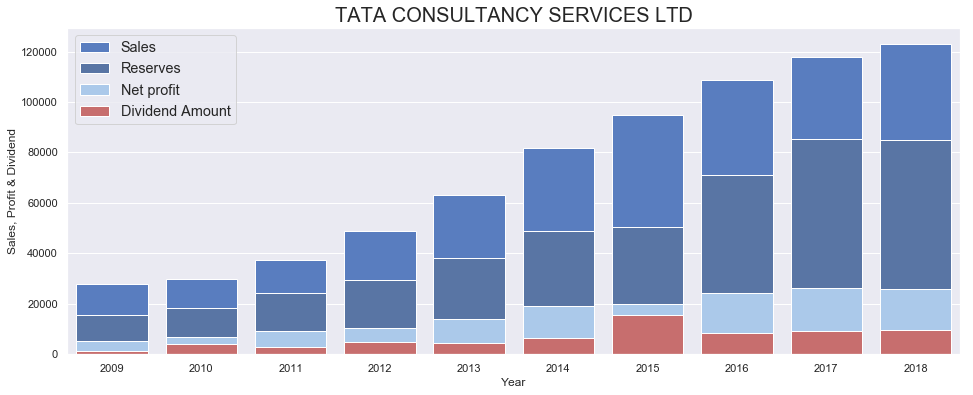

In [20]:
for company in df["Company"].unique():
    tempdf = df[df["Company"] == company]
    tempdf = tempdf.drop(columns=["Company"])
    sns.set_color_codes("muted")
    ax = sns.barplot(y="Sales", data=tempdf, x ='Report Date', color="b", label="Sales")
    
    sns.set_color_codes("deep")
    ax = sns.barplot(y="Reserves", data=tempdf, x ='Report Date', color="b", label="Reserves")

    sns.set_color_codes("pastel")
    ax = sns.barplot(y="Net profit", data=tempdf, x ='Report Date', color="b", label="Net profit")
    

    sns.set_color_codes("muted")
    ax = sns.barplot(y="Dividend Amount", data=tempdf, x ='Report Date', color="r", label="Dividend Amount")

    ax.set_title(company, fontsize=20)

    plt.xlabel('Year')
    plt.ylabel('Sales, Profit & Dividend')

    plt.legend(loc='upper left', fontsize = 'large')
    plt.show()

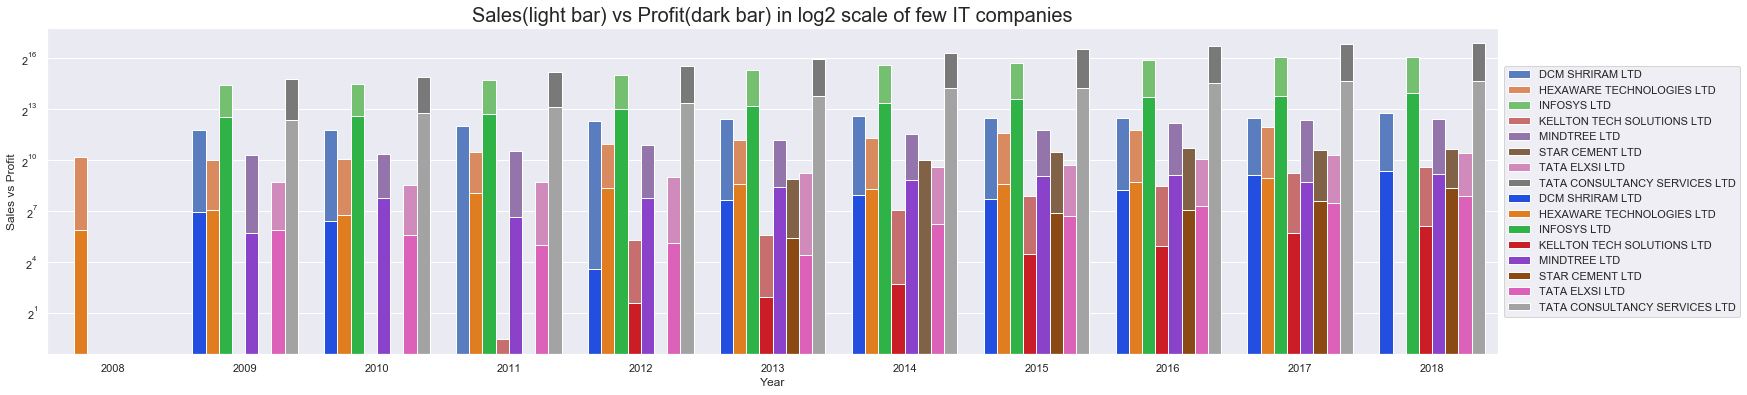

In [21]:
#sns.color_palette("hls", 8)
plt.rcParams['figure.figsize'] = [26, 6]
ax = sns.barplot(data=PLdf, x = 'Report Date', y="Sales", hue="Company", palette='muted')


#sns.set_color_codes("pastel")
ax = sns.barplot(data=PLdf, x = 'Report Date', y="Net profit", hue="Company", palette='bright')
ax.set_yscale('log', basey=2)
ax.set_title('Sales(light bar) vs Profit(dark bar) in log2 scale of few IT companies', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Sales vs Profit')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Analysis-chart.jpg', dpi=200 , bbox_inches='tight')